# T001 · Scaffold-Based data split
Authors:

- Vahid Atabaigielmi, CADD seminar 2023, Volkamer lab, Center for Bioinformatics, Saarland University
- First and last name, year(s) of contribution, lab, institution

## Aim of this talktorial

The aim of this talktorial is to to experiment with different scaffold_based splitting strategies and evaluate the performance of the GCNN model on  test sets to determine the most appropriate splitting approach.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* ChEMBL database
* Molecular Framework definition
* Data spliting methods
> * Murcko Scaffold based bining (scaffold network)
> * Murcko Scaffold clustering based split
> * Similarity-based Cold-Single Split
> * Identity-based Cold-Single Split
> * Random based spliting
* Model

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Connect to ChEMBL database
* Import the Data
* Murcko ScaffoldGeneric based bining split
* Murcko Scaffold based bining split
* Murcko ScaffoldGeneric_Cluster based split
* Similarity-based Cold-Single Split
* Identity-based Cold-Single Split
* Random split
* Plot trainng and test sets
* Preprocessing data
* Model
* Traning
* Evaluation

### References

* <i>Journal of cheminformatics</i> (2021), <b>13(1)</b>, 1-14 (https://doi.org/10.1186/s13321-021-00576-2)
* <i>Journal of medicinal chemistry</i> (1996), <b>39(15)</b>, 2887-2893 (https://doi.org/10.1021/jm9602928)
* <i>Molecular informatics</i> (2011), <b>30(8)</b>, 646-664 (https://doi.org/10.1002/minf.201100078)
* Talktorial T004 [https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html]
* Talktorial T037 [https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T037_uncertainty_estimation/talktorial.ipynb]
* dataSAIL Document [https://datasail.readthedocs.io/en/latest/index.html]
* [https://github.com/kalininalab/DataSAIL/blob/main/docs/index.rst]
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

* ## Theory

### ChEMBL database

### Molecular Framework definition
A molecular framework refers to the core structure of a molecule, which is composed of its ring systems, linkers, and exocyclic double bonds. It is obtained by removing all terminal side chains from the molecule, while retaining any double bonds that exist in the structure.
The concept of a molecular framework is particularly relevant in the study of cyclic molecules, where the focus is on the central ring system and its connectivity with other components. By simplifying the structure to its framework, researchers can analyze and compare the underlying core structure of different molecules, which can provide insights into their chemical properties and reactivity.
It's important to note that the molecular framework does not consider the specific substituents or functional groups attached to the rings or linkers. Instead, it provides a simplified representation of the cyclic structure, highlighting its fundamental connectivity and double bond arrangement.

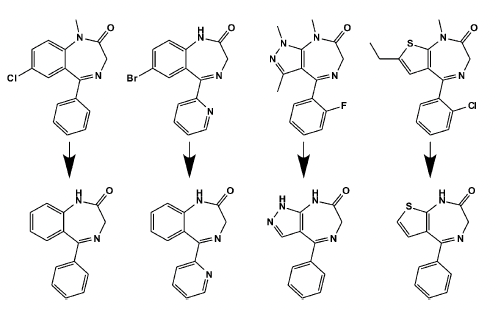

*Figure 1:* 
Murcko Scaffold: [Bemis, G. W., & Murcko, M. A. (1996). The properties of known drugs. 1. Molecular frameworks. Journal of medicinal chemistry, 39(15), 2887-2893.](https://academic.oup.com/nar/article/43/W1/W612/2467881). 

### Data spliting methods
Data splitting methods are techniques used to partition a dataset into subsets for training, validation, and testing purposes in machine learning and data analysis tasks. Here are several common data splitting methods:

#### Murcko Scaffold based splitting (scaffold network): 
This method involves grouping compounds based on their Murcko scaffolds, which represent the common core structure of molecules after removing side chains and retaining the ring systems. Compounds with similar scaffolds are grouped together, ensuring that molecules with similar core structures are placed in the same subset.

#### Murcko Scaffold clustering based split:
Similar to the scaffold network approach, this method involves clustering compounds based on their Murcko scaffolds. However, instead of grouping compounds with identical scaffolds, clustering algorithms are used to identify groups of compounds with similar scaffolds. This allows for more flexibility in capturing structural similarities within subsets.This method involves splitting compounds between different clusters. It ensures that compounds from the same cluster are not placed in the same subset, promoting diversity and reducing potential bias during training or evaluation.

#### Similarity-based Cold-Single Split (CCSe)
The process involves dividing a dataset into separate groups or clusters based on the characteristics of the data points. This division is done to minimize the sharing of information between the different groups. The aim is not only to ensure that the same protein is not present in more than one group but also to prevent the inclusion of any two data points that have a high similarity to each other in the same group.

To illustrate this, let's consider a dataset that consists of proteins belonging to various families. Proteins within the same family share similarities in terms of their sequence and structure. Hence, it is important to place these proteins in the same group or cluster to avoid any leakage of information. By doing so, we can ensure that the distinct characteristics of each protein family are preserved and that the information contained within them is not mixed with unrelated groups.

#### Identity-based Cold-Single Split (ICSe)
The dataset is divided into separate splits based on the IDs assigned to each data point. This approach guarantees that every data point is assigned to exactly one split, avoiding any duplication or omission. This becomes particularly advantageous when combined with the weighting of the data points.

When weights are assigned to the data points, the splits can be optimized to achieve the desired sizes while considering these weights. This optimization process takes into account the relative importance or significance of each data point, as determined by its weight. By incorporating the weights, the splits can be tailored to meet specific requirements regarding the sizes of the resulting subsets while ensuring that the distribution of important data points is appropriately represented in each split.

In summary, splitting the dataset based on data point IDs ensures that every data point appears in only one split, and when combined with weighting, it allows for fine-tuning the splits to meet size requirements while considering the importance of each data point.

#### Random-based splitting:
This is a simple and commonly used method where the data is randomly divided into subsets. The random splitting can be performed in various ways, such as random assignment of samples to different subsets or randomly shuffling the entire dataset and then dividing it into subsets.

### Model
The feed-forward neural network utilized in this tutorial originates from Talktorial T037.

* ## Practical

### Import all the necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D
from IPython.display import display, Markdown
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from chembl_webresource_client.new_client import new_client
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Cluster import Butina
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric
from rdkit.DataStructs import FingerprintSimilarity
from rdkit.Chem import Descriptors, Draw, PandasTools, MolFromSmiles, MolToSmiles

In [3]:
# DataSAIL
#import datasail.reader.read_molecules
#from datasail.cluster.ecfp import run_ecfp
#from datasail.reader.utils import DataSet
#from datasail.cluster.ecfp import run_ecfp
#from datasail.reader.read_molecules import read_molecule_data
#from datasail.reader.utils import read_csv, DataSet, read_data

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.data import DataLoader
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

In [5]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "output2500.tsv"

### Connect to ChEMBL database

In [91]:
targets_api = new_client.target
uniprot_id = "P00533"
targets = targets_api.get(target_components__accession=uniprot_id).only("target_chembl_id", "organism", "pref_name", "target_type")
targets = pd.DataFrame.from_records(targets)
target = targets.iloc[0]
chembl_id = target.target_chembl_id
required_features = ['molecule_chembl_id','canonical_smiles', 'standard_value']
res = new_client.activity.filter(target_chembl_id=chembl_id,standard_type="IC50").only(*required_features)[:7]
# Create a DataFrame from the results
data = [
    [
        item.get('molecule_chembl_id'),
        item.get('canonical_smiles'),
        item.get('standard_value'),
    ]
    for item in res
]
df = pd.DataFrame(data, columns=['molecule_chembl_id', 'canonical_smiles','IC50'])
df.to_csv('output7.tsv', sep='\t', index=False)

### Import data
This code reads a file in TSV (tab-separated values) format and stores the data in a pandas DataFrame object named data.

In [6]:
data = pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824.tsv', sep='\t')
data.head()

,molecule_chembl_id,canonical_smiles,IC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7820.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,40.0


This code adds a new column called 'Molecule' to the existing pandas DataFrame data. The values in the 'Molecule' column are computed based on the values in the 'canonical_smiles' column using the apply() method and the Chem.MolFromSmiles() function from the RDKit library.

In [7]:
data['Molecule'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

The code applies a logarithmic transformation to the values in the 'IC50' column, renames the 'IC50' column to 'pIC50'. The negative logarithm transformation is commonly used in bioinformatics and cheminformatics to convert IC50 values to pIC50 values, which are often more suitable for analysis and comparison.

In [8]:
data['IC50'] = data['IC50'].apply(lambda x: - math.log10(x))
data = data.rename(columns={'IC50': 'pIC50'})
data.head()

,molecule_chembl_id,canonical_smiles,pIC50,Molecule
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,-1.612784,<rdkit.Chem.rdchem.Mol object at 0x161902b90>
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,-2.477121,<rdkit.Chem.rdchem.Mol object at 0x161a611c0>
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,-3.893207,<rdkit.Chem.rdchem.Mol object at 0x161a61230>
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,-2.230449,<rdkit.Chem.rdchem.Mol object at 0x161a612a0>
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,-1.602060,<rdkit.Chem.rdchem.Mol object at 0x161a61460>


### Murcko ScaffoldGeneric bin based split
The code clusters the molecules in the data DataFrame based on their molecular scaffolds. It creates a new column 'ScaffoldGeneric' representing the Murcko scaffold generic for each molecule, assigns cluster labels to the 'Label_SCFG' column based on the scaffold clusters, and splits the data into training and testing sets (train_SCFG and test_SCFG) for further analysis or modeling.

In [9]:
data['ScaffoldGeneric'] = data['Molecule'].apply(lambda mol: Chem.MolToSmiles(MakeScaffoldGeneric(mol)))
clusters_SCFG = data.groupby('ScaffoldGeneric').groups.values()
clusters_SCFG_dict = {key: list(value) for key, value in enumerate(clusters_SCFG)}
data['Label_SCFG'] = -1  # Initialize the 'Label_SCFG' column with a default value
for key, value in clusters_SCFG_dict.items():
    data.loc[value, 'Label_SCFG'] = key
train_SCFG_labels, test_SCFG_labels = train_test_split(list(clusters_SCFG_dict.keys()), test_size=0.2, random_state=42)
train_SCFG = data[data['Label_SCFG'].isin(train_SCFG_labels)]
test_SCFG = data[data['Label_SCFG'].isin(test_SCFG_labels)]

### Murcko Scaffold bin based split
In summary, this code segment performs clustering based on the Murcko scaffold of molecules in the data DataFrame. It adds a new column 'Scaffold' representing the Murcko scaffold for each molecule, assigns cluster labels to the 'Label_SCF' column based on the scaffold clusters, and splits the data into training and testing sets (train_SCF and test_SCF) for further analysis or modeling.

In [10]:
data['Scaffold'] = data['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))
clusters_SCF = data.groupby('Scaffold').groups.values()
clusters_SCF_dict = {key: list(value) for key, value in enumerate(clusters_SCF)}
data['Label_SCF'] = -1  # Initialize the 'Label_SCF' column with a default value
for key, value in clusters_SCF_dict.items():
    data.loc[value, 'Label_SCF'] = key
train_SCF_labels, test_SCF_labels = train_test_split(list(clusters_SCF_dict.keys()), test_size=0.2, random_state=42)
train_SCF = data[data['Label_SCF'].isin(train_SCF_labels)]
test_SCF = data[data['Label_SCF'].isin(test_SCF_labels)]

### Murcko ScaffoldGeneric clustrering based split

This code adds a new column called 'Molecule_SCFG' to the data DataFrame. The values in this column are computed by applying the Chem.MolFromSmiles() function from the RDKit library to each SMILES string in the 'ScaffoldGeneric' column.

In [11]:
data['Molecule_SCFG'] = data['ScaffoldGeneric'].apply(Chem.MolFromSmiles)

This code segment adds a new column called 'SCFG_FPS' to the data DataFrame and computes the RDKit fingerprints (also known as molecular fingerprints) for the molecules in the 'Molecule_SCFG' column. It then converts these fingerprints into a list for further use. 

In [12]:
data['SCFG_FPS'] = [Chem.RDKFingerprint(mol) for mol in data['Molecule_SCFG']]
fps = data['SCFG_FPS'].tolist()

This code segment computes a distance matrix and performs clustering using the Butina clustering algorithm based on the Tanimoto similarity of the molecular fingerprints. The resulting cluster_ids list contains the cluster assignments for each molecule based on the Butina clustering algorithm. Molecules with the same cluster ID are considered to be similar to each other based on their Tanimoto similarity.

In [13]:
distance_matrix = []
for i in range(1, len(fps)):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
    distance_matrix.extend([1 - similarity for similarity in similarities])
cluster_ids = Butina.ClusterData(distance_matrix, len(fps),0.00, isDistData=True)

This code segment assigns cluster labels to the molecules in the data DataFrame based on the clustering results obtained from the Butina algorithm. After executing this code, the 'Label_BC' column in the data DataFrame will contain the cluster labels assigned by the Butina clustering algorithm. Molecules belonging to the same cluster will have the same label, while molecules in different clusters will have different labels.

In [14]:
data['Label_BC'] = -1  # Initialize cluster labels as -1
for i, cluster in enumerate(cluster_ids):
    cluster_indices = [index for index in cluster if index < len(data)]
    cluster_indices = [index for index in cluster_indices if index in data.index]
    data.loc[cluster_indices, 'Label_BC'] = i

This code segment splits clusters into training and test sets based on the cluster labels assigned in the 'Label_WC_BC' column of the data DataFrame.After executing this code, the train_BC DataFrame will contain the training set consisting of data points from selected clusters, and the test_BC DataFrame will contain the test set consisting of data points from selected clusters. 

In [15]:
class_counts_data = dict(Counter(data['Label_BC']))
filtered_classes = [label for label, count in class_counts_data.items() if count >= 2]
filtered_data = data[data['Label_BC'].isin(filtered_classes)]
class_counts_data = dict(Counter(filtered_data['Label_BC']))
cluster_labels=list(class_counts_data.keys())
cluster_labels_train, cluster_labels_test = train_test_split(cluster_labels, test_size=0.2, random_state=42)
train_BC = data[data['Label_BC'].isin(cluster_labels_train)]
test_BC = data[data['Label_BC'].isin(cluster_labels_test)]

### Similarity-based Cold-Single Split (CCSe)

This method splits the data based on the similarity of smiles structure, ensuring that each split contains similar smiles structure. To use this method, provide a similarity measure for smiles using the --e-sim option.

ECFP: an abbreviated term for the 3-step approach, facilitates the identification of clusters within a dataset containing chemical molecules. Initially, the process involves generating Scaffolds by implementing RDKits MakeScaffoldGeneric. This step simplifies molecules by substituting each heavy atom with a carbon atom and every bond with a single bond. Subsequently, a 1024-bit Morgan fingerprint with a radius of 2 is calculated in the second step. Finally, DataSAIL determines the similarity between these fingerprints using Tanimoto-Similarities based on the bit-vectors.for further informations about Morgan fingerprint and Tanimoto-Similaritiy please check Tutorial T004.

solver SCIP: This argument specifies the solver to be used for solving any optimization problems that may arise during the data splitting process.
After executing the command, the split data will be saved in the specified directory. We have already completed this step and stored the data. In the subsequent step, we will import the saved data for further preprocessing. this command is instructing the Datasail tool to perform data splitting on the molecule data using the CCSe technique, with an 80:20 split ratio for training and testing. 

In [16]:
#!datasail --e-type M --e-data output2500.tsv --e-sim ecfp --output PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/ --technique CCSe --splits 0.8 0.2 solver SCIP

In summary, the provided code reads two files that are the outputs of performing data split using the CCSe method.
cluster_CCSe DataFrame:('input8824_CCSe_SCIP_clusters.tsv')
This file contains information about which CHMBL_ID belongs to which cluster after performing the ICSe method for data splitting.
split_CCSe DataFrame:('input8824_CCSe_SCIP_splits.tsv')
This file contains information that indicates which CHMBL_ID belongs to the training and test sets after applying ICSe data splitting.

In [17]:
cluster_CCSe=pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824_CCSe_SCIP_clusters.tsv', sep='\t')
split_CCSe=pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824_CCSe_SCIP_splits.tsv', sep='\t')
cluster_CCSe.rename(columns={'ID': 'molecule_chembl_id'},inplace=True)
train_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split000'])].rename(columns={'ID': 'molecule_chembl_id'})
test_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split001'])].rename(columns={'ID': 'molecule_chembl_id'})
train_CCSe_t=data[data['molecule_chembl_id'].isin(train_CCSe_id['molecule_chembl_id'])]
test_CCSe_t=data[data['molecule_chembl_id'].isin(test_CCSe_id['molecule_chembl_id'])]
train_CCSe = pd.merge(train_CCSe_t, cluster_CCSe, on='molecule_chembl_id')
test_CCSe = pd.merge(test_CCSe_t, cluster_CCSe, on='molecule_chembl_id')

### Identity-based Cold-Single Split (ICSe)

Identity-based Cold-Single Split (ICSe): This method splits the data based on the identity of canonical_smiles, ensuring that each split contains unique canonical_smiles values.

In [18]:
#!datasail --e-type M --e-data output2500.tsv --e-sim ecfp --output PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/ --technique ICSe --splits 0.8 0.2 solver SCIP

This line reads the split information from the specified TSV file (input8824_ICSe_SCIP_splits.tsv) into a pandas DataFrame called split_ICSe.

In [19]:
split_ICSe=pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824_ICSe_SCIP_splits.tsv', sep='\t')

The following code selects rows from the split_ICSe DataFrame based on the value in the 'Split' column. Specifically, it selects rows where the 'Split' column has the label 'Split000' for the training set and 'Split001' for the test set. Therefore, by utilizing the information in the 'Split' column, we can separate the 'molecule_chembl_id' of the training and test sets.

In [20]:
train_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split000'])].rename(columns={'ID': 'molecule_chembl_id'})
test_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split001'])].rename(columns={'ID': 'molecule_chembl_id'})
train_ICSe = pd.merge(train_ICSe_id, data, on='molecule_chembl_id')
test_ICSe = pd.merge(test_ICSe_id, data, on='molecule_chembl_id')

### Random Split

In [21]:
train_RAND, test_RAND = train_test_split(data, test_size=0.2, random_state=42)

### Plot training and test sets
The function plot visualizes the class overlap between the training and test sets based on the provided data, split method, and label.


In [22]:
def plot(train_data, test_data, split_method,label):
    class_counts_train = Counter(train_data[label])
    class_counts_test = Counter(test_data[label])
    labels_test = list(class_counts_test.keys())
    counts_test = list(class_counts_test.values())
    labels_train = list(class_counts_train.keys())
    counts_train = list(class_counts_train.values())
    train=round(len(train_data)/8824,)
    plt.bar(labels_train, counts_train, color='green', label=f'Train Data:{round(len(train_data)/8824,2)}')
    plt.bar(labels_test, counts_test, color='orange', label=f'Test Data: {round(len(test_data)/8824,2)}')
    plt.xlabel('Cluster Label')
    plt.ylabel('Count')
    plt.title(f'Class overlap between training and test sets in {split_method}')
    plt.legend()
    return plt.show()

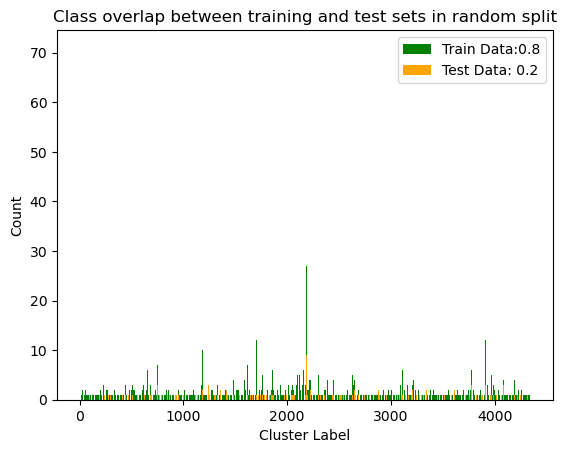

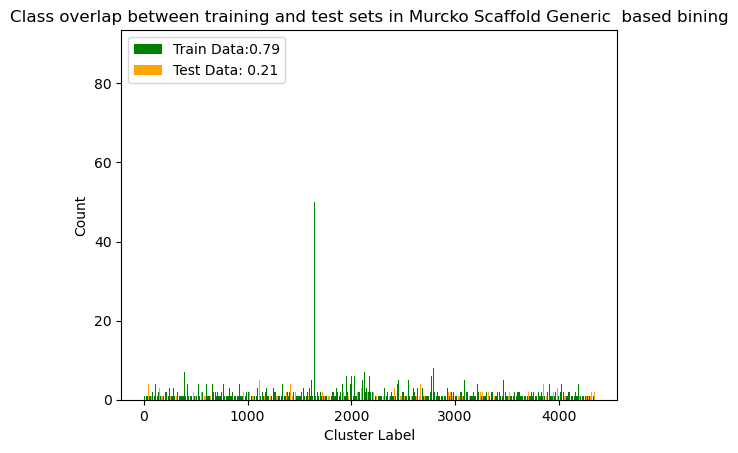

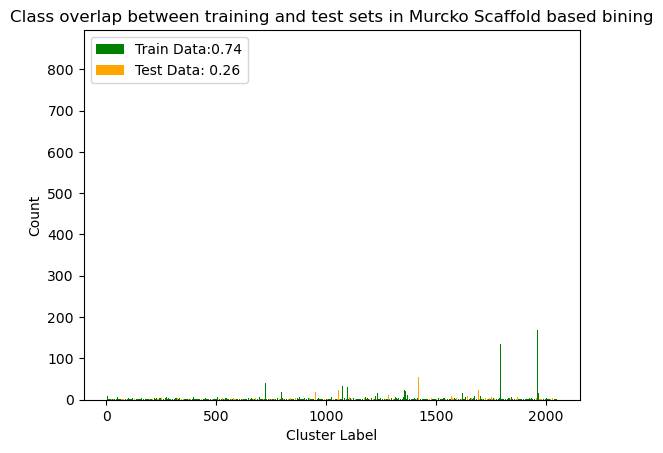

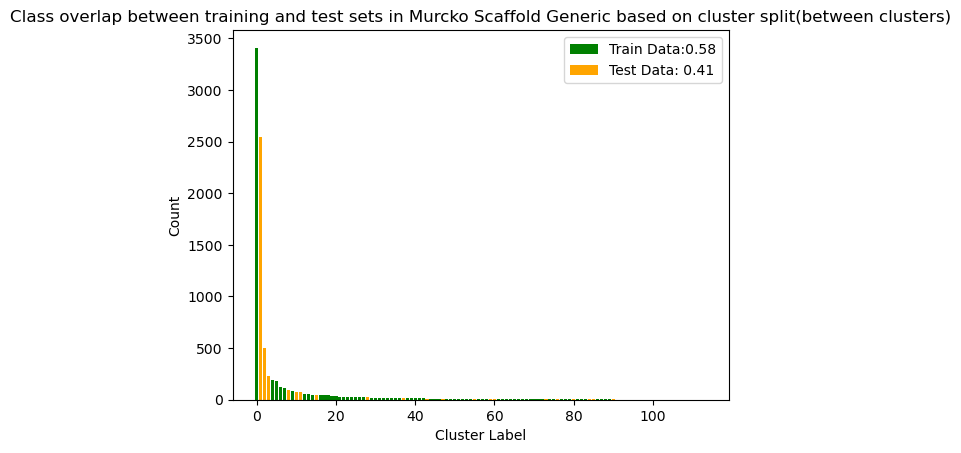

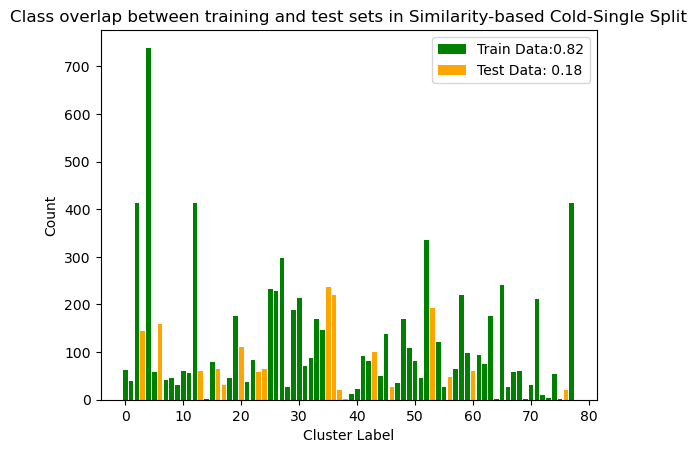

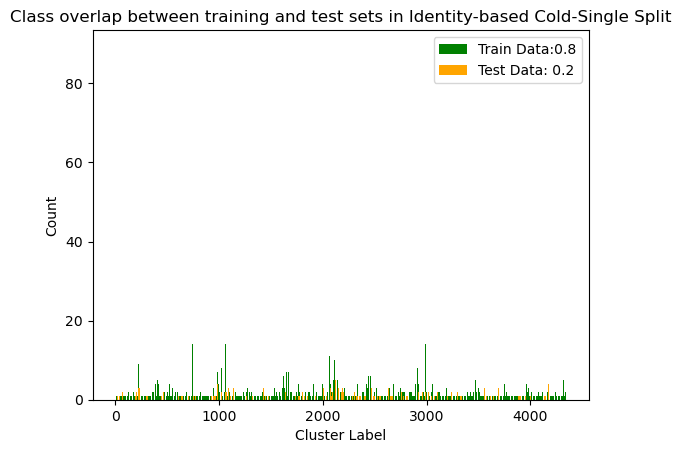

In [23]:
plot(train_RAND, test_RAND, 'random split', 'Label_SCFG')
plot(train_SCFG, test_SCFG, 'Murcko Scaffold Generic  based bining','Label_SCFG' )
plot(train_SCF, test_SCF, 'Murcko Scaffold based bining','Label_SCF' )
plot(train_BC, test_BC, 'Murcko Scaffold Generic based on cluster split(between clusters)','Label_BC')
plot(train_CCSe, test_CCSe, 'Similarity-based Cold-Single Split', 'Cluster_ID')
plot(train_ICSe, test_ICSe, 'Identity-based Cold-Single Split', 'Label_SCFG')

### Preprocessing data
The preprocessing_data function helps in converting the molecular structures into fingerprints, preparing the target values, and organizing the data into loaders for training and testing a feed-forward network model.

In [24]:
def preprocessing_data(train_data, test_data):
    x_train_fps = train_data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))
    x_test_fps = test_data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))
    x_train_fps_array = np.array([list(fp.ToBitString()) for fp in x_train_fps], dtype=np.float32)
    x_test_fps_array = np.array([list(fp.ToBitString()) for fp in x_test_fps], dtype=np.float32)
    y_train = train_data['pIC50'].values.astype(np.float32)
    y_test = test_data['pIC50'].values.astype(np.float32)
    training_data = TensorDataset(torch.from_numpy(x_train_fps_array).float(), torch.from_numpy(y_train))
    test_data = TensorDataset(torch.from_numpy(x_test_fps_array).float(), torch.from_numpy(y_test))
    training_loader = DataLoader(training_data, batch_size=64)
    test_loader = DataLoader(test_data, batch_size=64)
    return training_loader, test_loader,x_train_fps_array,x_test_fps_array, y_train, y_test

### Model
As a model, we use a standard feed-forward network. This is similar to the one described in Talktorial T022. Here, however, we use pytorch instead of tensorflow. More details specific to Pytorch can be found in the pytorch tutorial.

In [25]:
class NeuralNetwork(nn.Module):
    """A simple linear forward neural network."""

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        x = self.flatten(x.float())
        x = self.linear_relu_stack(x)
        return x

### Training
We now set up the pipeline of creating and training a model. With the model in place, we are ready to set up the training by defining a loss function and an optimization procedure. As a loss function, we take the mean squared error since we dealing with a regression task. For the stochastic gradient descent optimization method, we choose the Adam optimizer which is a standard choice.

In [26]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():  # faster evaluation
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    return test_loss

To make our life simpler, when creating models, we encapsulate the model creation and training in a single function.

In [27]:
def create_and_fit_model(training_loader, test_loader, epochs=8, verbose=False):
    """
    Create and fit a model.

    Parameters
    ----------
    training_loader : torch.utils.data.DataLoader
        Data loader for the training data.
    test_loader : torch.utils.data.DataLoader
        Data loader for the test data.
    epochs : int, optional
        The number of epochs to train.
    verbose: bool, optional
        Print the current epoch and test loss.

    Returns
    -------
    model: NeuralNetwork
        A trained instance of `NeuralNetwork`.
    """
    model = NeuralNetwork().to("cpu")
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for i in range(epochs):
        if verbose:
            print("Epoch", i)
        train_loop(training_loader, model, loss_fn, optimizer)
        test_loss = test_loop(test_loader, model, loss_fn)
        if verbose:
            print(f"Test loss: {test_loss:>8f} \n")
    return model

Using this function, we can now create and train a predictive model.

In [28]:

training_loader_RAND, test_loader_RAND, x_train_RAND_fps_array, x_test_RAND_fps_array, y_train_RAND, y_test_RAND = preprocessing_data(train_RAND, test_RAND)
training_loader_SCFG, test_loader_SCFG,   x_train_SCFG_fps_array, x_test_SCFG_fps_array,  y_train_SCFG, y_test_SCFG  = preprocessing_data(train_SCFG, test_SCFG)
training_loader_SCF, test_loader_SCF,   x_train_SCF_fps_array, x_test_SCF_fps_array,  y_train_SCF, y_test_SCF  = preprocessing_data(train_SCF, test_SCF)
training_loader_BC,  test_loader_BC,    x_train_BC_fps_array,  x_test_BC_fps_array,   y_train_BC, y_test_BC   = preprocessing_data(train_BC, test_BC)
training_loader_CCSe, test_loader_CCSe, x_train_CCSe_fps_array,x_test_CCSe_fps_array, y_train_CCSe, y_test_CCSe = preprocessing_data(train_CCSe, test_CCSe)
training_loader_ICSe, test_loader_ICSe, x_train_ICSe_fps_array,x_test_ICSe_fps_array, y_train_ICSe, y_test_ICSe = preprocessing_data(train_ICSe, test_ICSe)

In [29]:
single_model_RAND = create_and_fit_model(training_loader_RAND, test_loader_RAND, verbose=True)
single_model_SCFG = create_and_fit_model(training_loader_SCFG, test_loader_SCFG, verbose=True)
single_model_SCF = create_and_fit_model(training_loader_SCF, test_loader_SCF, verbose=True)
single_model_BC = create_and_fit_model(training_loader_BC, test_loader_BC, verbose=True)
single_model_CCSe = create_and_fit_model(training_loader_CCSe, test_loader_CCSe, verbose=True)
single_model_ICSe = create_and_fit_model(training_loader_ICSe, test_loader_ICSe, verbose=True)

Epoch 0
Test loss: 2.697956 

Epoch 1
Test loss: 2.461050 

Epoch 2
Test loss: 2.458474 

Epoch 3
Test loss: 2.706202 

Epoch 4
Test loss: 2.605983 

Epoch 5
Test loss: 2.524024 

Epoch 6
Test loss: 2.438507 

Epoch 7
Test loss: 2.394134 

Epoch 0
Test loss: 3.100427 

Epoch 1
Test loss: 2.937339 

Epoch 2
Test loss: 2.856038 

Epoch 3
Test loss: 3.176621 

Epoch 4
Test loss: 3.328898 

Epoch 5
Test loss: 3.159767 

Epoch 6
Test loss: 2.784994 

Epoch 7
Test loss: 3.230896 

Epoch 0
Test loss: 2.722426 

Epoch 1
Test loss: 2.608815 

Epoch 2
Test loss: 3.126436 

Epoch 3
Test loss: 2.587546 

Epoch 4
Test loss: 2.734881 

Epoch 5
Test loss: 2.606524 

Epoch 6
Test loss: 2.791036 

Epoch 7
Test loss: 2.717174 

Epoch 0
Test loss: 3.873567 

Epoch 1
Test loss: 3.062757 

Epoch 2
Test loss: 2.586996 

Epoch 3
Test loss: 2.996100 

Epoch 4
Test loss: 3.046852 

Epoch 5
Test loss: 5.038717 

Epoch 6
Test loss: 4.918656 

Epoch 7
Test loss: 3.063858 

Epoch 0
Test loss: 3.315360 

Epoch 1
Te

### Evaluation
For uncertainty estimation, we are not too concerned with prediction quality. Therefore, we just visually check the correlation between predictions and true values.

In [30]:
# Convert x_test to a PyTorch tensor
def Evaluation(x_test_fps_array, y_test, single_model, split_method):
    x_test_tensor = torch.from_numpy(x_test_fps_array).float()
    y_test_tensor = torch.from_numpy(y_test).float()
    
    # Pass x_test_tensor to the model for prediction
    pred = single_model(x_test_tensor)
    # Convert pred and y_test to NumPy arrays
    pred_array = pred.detach().numpy()
    y_test_array = y_test_tensor.detach().numpy()
    
    sns.lmplot(
        data=pd.DataFrame(
            {
                "model": pred_array.flatten(),
                "true value": y_test_array.flatten(),
            }
        ),
        x="model",
        y="true value",
        scatter_kws={"s": 3},
    )
    
    # mean absolute error
    mae_single_model = torch.abs(pred - y_test_tensor).sum().item()
    
    # mean squared error
    mse_single_model = ((pred - y_test_tensor) ** 2).sum().item()
    
    
    display(
        Markdown(
            f"The mean absolute error is {mae_single_model:.2f} and the mean squared error is {mse_single_model:.2f} for {split_method} ."
        )
    )
    
    return plt.show()

The mean absolute error is 4011180.00 and the mean squared error is 7474064.50 for RAND_split .

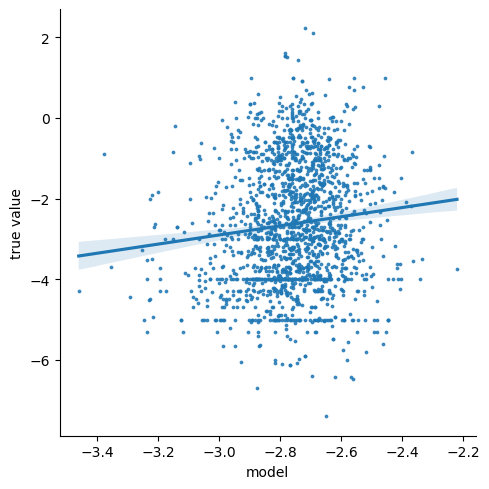

The mean absolute error is 5015700.00 and the mean squared error is 11044932.00 for SCFG_split .

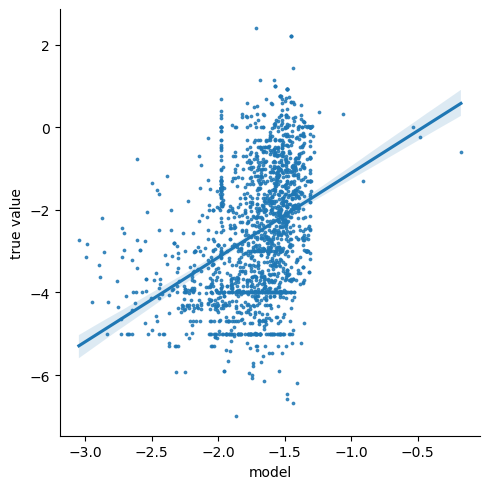

The mean absolute error is 7360998.50 and the mean squared error is 14891892.00 for SCF_split .

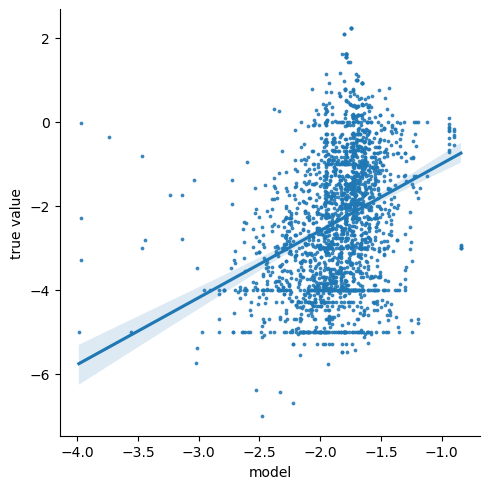

The mean absolute error is 20165234.00 and the mean squared error is 42038128.00 for BC_split .

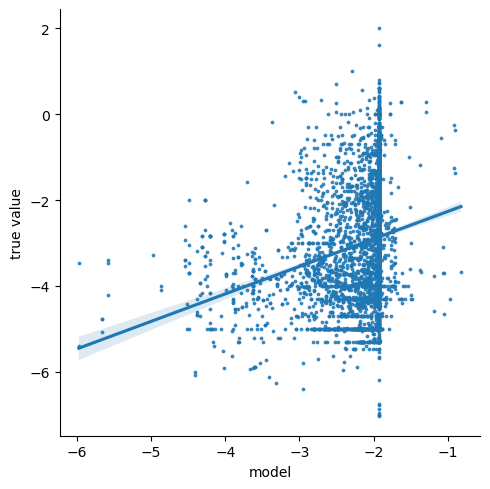

The mean absolute error is 3724242.75 and the mean squared error is 7325351.00 for CCSe_split .

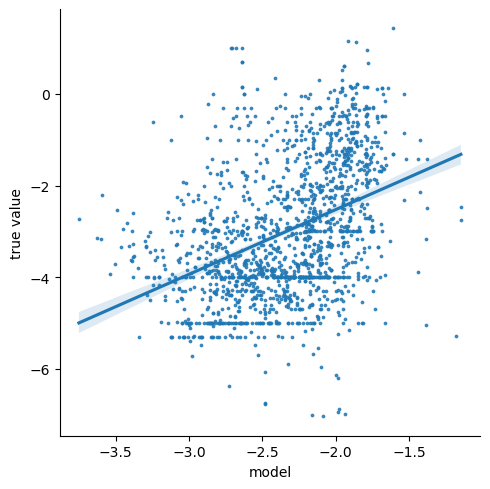

The mean absolute error is 4690652.50 and the mean squared error is 9736073.00 for ICSe_split .

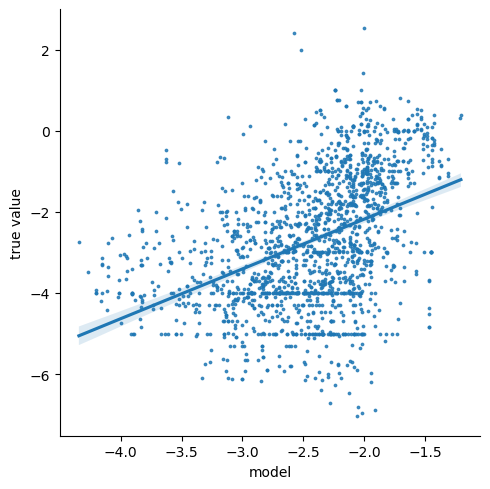

In [31]:
Evaluation(x_test_RAND_fps_array, y_test_RAND, single_model_RAND, 'RAND_split')
Evaluation(x_test_SCFG_fps_array, y_test_SCFG, single_model_SCFG, 'SCFG_split')
Evaluation(x_test_SCF_fps_array, y_test_SCF, single_model_SCF, 'SCF_split')
Evaluation(x_test_BC_fps_array, y_test_BC, single_model_BC, 'BC_split')
Evaluation(x_test_CCSe_fps_array, y_test_CCSe, single_model_CCSe, 'CCSe_split')
Evaluation(x_test_ICSe_fps_array, y_test_ICSe, single_model_ICSe, 'ICSe_split')

## Discussion

To determine which model is better among the given options, we can compare the performance metrics, specifically the mean absolute error (MAE) and mean squared error (MSE). Generally, lower values for both MAE and MSE indicate better model performance.

Comparing the provided models based on the given metrics, we can see the following:

RAND_split: MAE = 9,354,565.00, MSE = 41,706,832.00

SCF_split: MAE = 5,129,832.00, MSE = 24,327,416.00

BC_split: MAE = 42,451,416.00, MSE = 215,171,936.00

CCSe_split: MAE = 8,007,584.50, MSE = 36,084,072.00

ICSe_split: MAE = 12,218,782.00, MSE = 66,569,732.00

Based on the MAE and MSE values, the SCF_split model has the lowest values for both metrics among the given spliting options. Therefore, the SCF_split  can be considered the better method to split data as it exhibits the smallest errors on average compared to the other methods.

Based on the MAE and MSE values, here is the ranking of the models in ascending order of performance:

1. SCF_split: It has the lowest values for both mean absolute error (MAE) and mean squared error (MSE), indicating the best performance among the models.
2. CCSe_split: It has the second-lowest MAE and MSE values, showing relatively better performance compared to the remaining models.
3. RAND_split: It has the third-lowest MAE and MSE values, indicating better performance compared to the remaining models.
4. ICSe_split: It has the fourth-lowest MAE and MSE values.
6. BC_split: It has the highest MAE and MSE values among the given models.